In [1]:
import pandas as pd
ball=pd.read_excel("C:/Users/Administrator/Desktop/python/IPL Data/Ball_by_Ball.xlsx")

In [2]:
match=pd.read_excel("C:/Users/Administrator/Desktop/python/IPL Data/Match.xlsx")

In [3]:
player=pd.read_excel("C:/Users/Administrator/Desktop/python/IPL Data/Player.xlsx")

In [4]:
player_match=pd.read_excel("C:/Users/Administrator/Desktop/python/IPL Data/Player_Match.xlsx")

In [5]:
season=pd.read_excel("C:/Users/Administrator/Desktop/python/IPL Data/Season.xlsx")

In [6]:
team=pd.read_excel("C:/Users/Administrator/Desktop/python/IPL Data/Team.xlsx")

In [7]:
ball.dtypes

Match_Id                     int64
Season_Id                    int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored               int64
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

In [10]:
#les change data type of columns
cols=[col for col in ball.columns if col not in ['Batsman_Scored',"Extra_Runs"]]
ball[cols]=ball[cols].apply(lambda x:x.astype('category'))
ball.dtypes

Match_Id                    category
Season_Id                   category
Innings_Id                  category
Over_Id                     category
Ball_Id                     category
Team_Batting_Id             category
Team_Bowling_Id             category
Striker_Id                  category
Striker_Batting_Position    category
Non_Striker_Id              category
Bowler_Id                   category
Batsman_Scored                 int64
Extra_Type                  category
Extra_Runs                    object
Player_dissimal_Id          category
Dissimal_Type               category
Fielder_Id                  category
dtype: object

## bar chart if we have the differnece level of categorical variable

In [20]:
#Univeriate analysis- PS 1: is team batting first scoring more runs or team chasing scoring more runs?
Runs_by_innings=ball.groupby('Innings_Id')['Batsman_Scored'].sum().reset_index().sort_values(by="Batsman_Scored")
Runs_by_innings

,Innings_Id,Batsman_Scored
3,4,70
2,3,80
1,2,78989
0,1,86811


In [24]:
##Actually inning id 3 & 4 refer to inning 1st Na d 2nd in super over matches. this
First_Inning_runs=Runs_by_innings[(Runs_by_innings['Innings_Id']==1) | (Runs_by_innings["Innings_Id"]==3)]['Batsman_Scored'].sum()
print(First_Inning_runs)
Second_Inning_runs=Runs_by_innings[(Runs_by_innings['Innings_Id']==2) | (Runs_by_innings["Innings_Id"]==4)]["Batsman_Scored"].sum()
print(Second_Inning_runs)

86891
79059


In [26]:
#lets creat the list of two columns
Final_Data=pd.DataFrame()
Inning=['First Inning','Second Innings']
Runs=[First_Inning_runs,Second_Inning_runs]
Final_Data['Inning']=Inning
Final_Data['Runs']=Runs
Final_Data

,Inning,Runs
0,First Inning,86891
1,Second Innings,79059


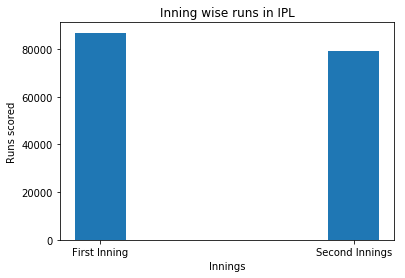

In [31]:
#lets plot this in form of bar chart
from matplotlib import pyplot as plt
plt.bar(Final_Data['Inning'],Final_Data['Runs'],width=.2)
plt.xlabel("Innings")
plt.ylabel("Runs scored")
plt.title("Inning wise runs in IPL")
plt.show()

In [38]:
Toss_decision=match.groupby(['Toss_Decision']).size().reset_index()
Toss_decision

,Toss_Decision,0
0,bat,262
1,field,315


In [39]:
#lets re name the columns
Toss_decision=Toss_decision.rename(columns={0:"Number of Matches"})
Toss_decision

,Toss_Decision,Number of Matches
0,bat,262
1,field,315


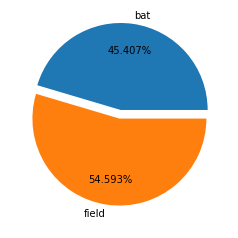

In [70]:
#we can represent the same by pie chart
import matplotlib.pyplot as plt
# we will use to indicate pecentage  label on pie chart
plt.pie(Toss_decision["Number of Matches"],labels=Toss_decision['Toss_Decision'],explode=(0.1,0),autopct='%.3f%%',pctdistance=0.7)
plt.show()

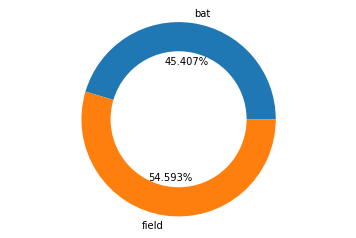

In [77]:
# can also creat a donut from this pie
#  we can just change chart to donut chart by drawing a circle with white color
# draw a circle of center (0,0)
plt.pie(Toss_decision["Number of Matches"],labels=Toss_decision['Toss_Decision'],autopct='%.3f%%',pctdistance=0.6)
centre_circle=plt.Circle((0,0),0.7,fc="white")
##gcf=get current fig
##gca=get current axis
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis("equal")
plt.show()

In [1]:
#Understanding the data distribution
# lets change the data set as this data set do not have much numerical column
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/Administrator/Downloads/Automobile_data.csv")

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


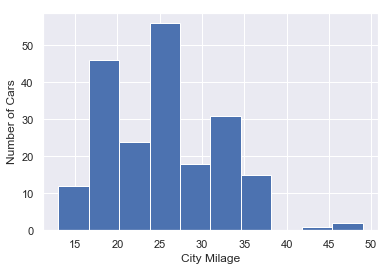

In [9]:
#lets check if the city milage and highway milage is normalay diributed
# lets first check overall city milage and highway milage
# city milage distribution
from matplotlib import pyplot as plt
import seaborn as sns
plt.hist(data['city-mpg'])
plt.xlabel('City Milage')
plt.ylabel('Number of Cars')
sns.set()
plt.show()


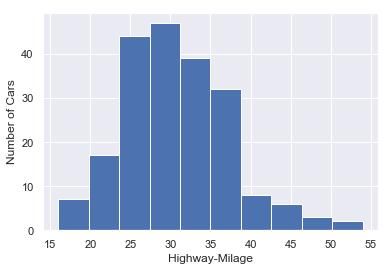

In [10]:
#Highway milage distribution graph
plt.hist(data['highway-mpg'])
plt.xlabel('Highway-Milage')
plt.ylabel('Number of Cars')
plt.show()

Text(0.5, 0, 'Highway Milage')

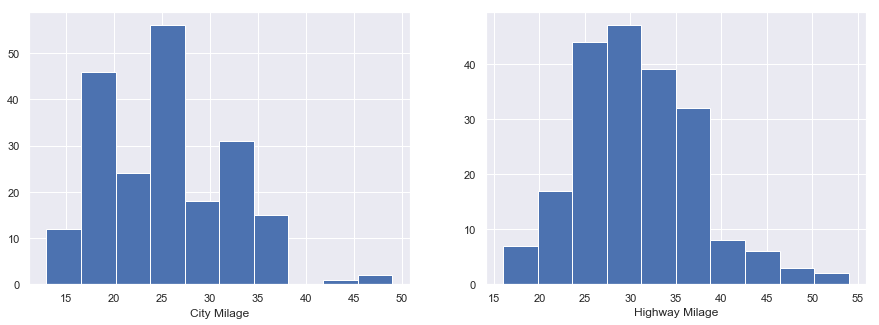

In [11]:
# incase if you want to plot the graph of both the city milage and highway milage
plt.rcParams['figure.figsize']=[15,5]
fig=plt.figure()

#plt.subplot(rows,cols,for which you are drawing this)
plt.subplot(1,2,1)
plt.hist(data['city-mpg'])
plt.xlabel('City Milage')

plt.subplot(1,2,2)
plt.hist(data['highway-mpg'])
plt.xlabel("Highway Milage")

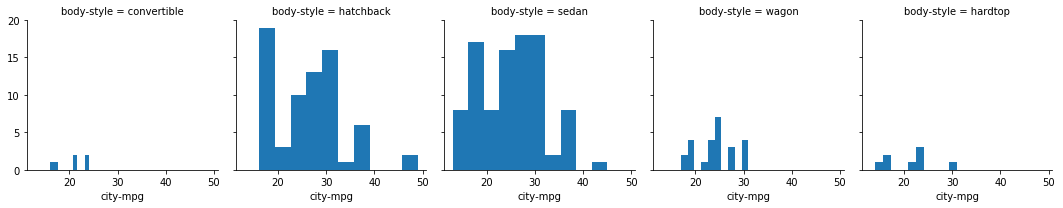

In [94]:
# let's see how the city milage vary with each class
import seaborn as sns
from matplotlib import pyplot as plt
g=sns.FacetGrid(data,col='body-style')
g=g.map(plt.hist,"city-mpg")
plt.show()

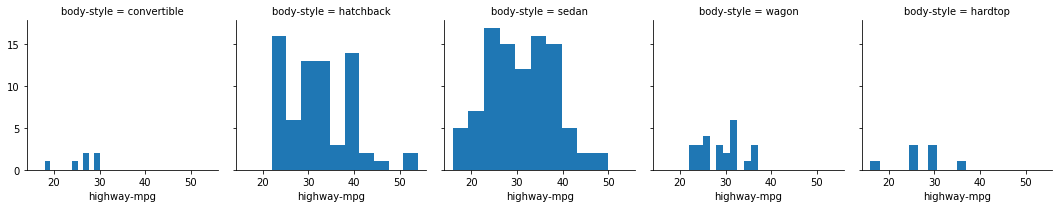

In [95]:
g=sns.FacetGrid(data,col='body-style')
g=g.map(plt.hist,"highway-mpg")
plt.show()

In [96]:
#Now that we hav eseen that the city milage and high way milage are not normally distributed
#we would like to see the if the skewness in the city milage and highway milage is very high?

data.skew()

symboling            0.211072
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
compression-ratio    2.610862
city-mpg             0.663704
highway-mpg          0.539997
dtype: float64

In [97]:
# to deal with skewness of the data wwe apply transformation on data
# skewness treatment
import numpy as np
data['cty_log']=np.log(data['city-mpg'])
data['city_sqrt']=np.sqrt(data['city-mpg'])

data.skew()

symboling            0.211072
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
compression-ratio    2.610862
city-mpg             0.663704
highway-mpg          0.539997
cty_log              0.003106
city_sqrt            0.316761
dtype: float64

In [ ]:
skewness
   to reduce right skewness, take roots or logarithms or reciprocal(roots are weakest)
    
    to reduce left skewness,take square or cubes or higher power

In [104]:
data['city-mpg'].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

In [109]:
#data['city-mpg'].plot(kind='box')

In [107]:
data['highway-mpg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

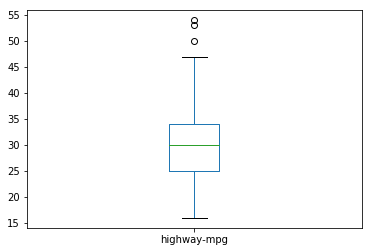

In [13]:
data['highway-mpg'].plot(kind='box')

In [12]:
import matplotlib.pyplot as plt
x=data[['city-mpg','highway-mpg']].values
plt.boxplot(x)
plt.show()

<Figure size 640x480 with 1 Axes>

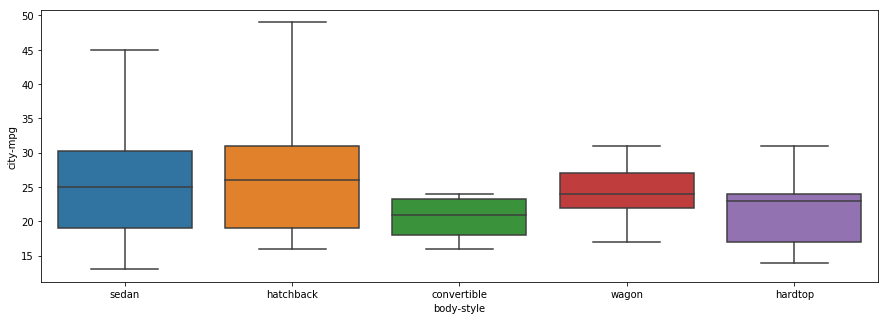

In [122]:
#Using seaborn lib -also adding a categorical column -city milage for each class 
import seaborn as sns
order=["sedan",'hatchback','convertible','wagon','hardtop']
sns.boxplot(data=data,x='body-style',y='city-mpg',order=order)
plt.show()

## Remove of outlier

In [24]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


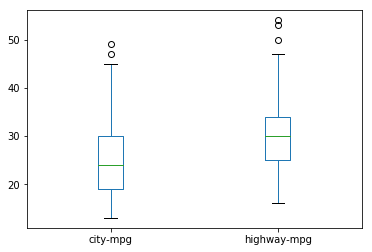

In [25]:
data[['city-mpg','highway-mpg']].plot(kind='box')

In [26]:
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

data[['city-mpg','highway-mpg']]=data[['city-mpg','highway-mpg']].apply(lambda x: outlier_capping(x))
data[['city-mpg','highway-mpg']].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


,city-mpg,highway-mpg
count,205.000000,205.000000
mean,25.204878,30.680488
std,6.491659,6.682147
min,13.000000,16.000000
25%,19.000000,25.000000
50%,24.000000,30.000000
75%,30.000000,34.000000
max,46.500000,47.500000


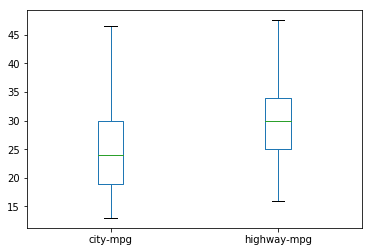

In [27]:
data[['city-mpg','highway-mpg']].plot(kind='box')

## Encoding

In [29]:
#?pd.get_dummies

In [48]:
#New file of startup dataset
import pandas as pd
startup_data=pd.read_csv('C:/Users/Administrator/Downloads/50_Startups.csv')

In [49]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
startup_data.shape

(50, 5)

In [35]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [36]:
#get_dummies
x=pd.get_dummies(startup_data,prefix=['state'])
x.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_California,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [50]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()
startup_data['state1']=x1.fit_transform(startup_data['State'])
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state1
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [51]:
## One hot encoder

from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
startup_data1=onehotencoder.fit_transform(startup_data.iloc[:,[3]]).toarray()
startup_data1=startup_data1.astype(int)
startup_data1

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

## Car data set

In [102]:
car=pd.read_csv("C:/Users/Administrator/Downloads/mpg.csv")

In [103]:
car.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Numerical columns vs numerical column : analysis that can be performed:
1> Relationship analysis-Scatter plot
2> Corelation analysis-Corelation matrix and plot
3> regression analysis-Simple liner regression(SLM)

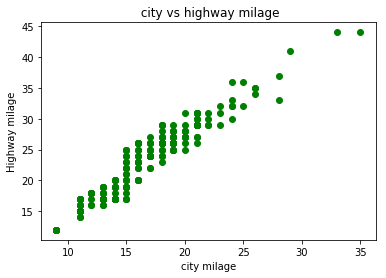

In [57]:
# Relationship analysis_scatter plot
#want to understand what is the relationship between city mpg and highwy mpg
import matplotlib.pyplot as plt
plt.scatter(car['cty'],car['hwy'],color='green')
plt.xlabel('city milage')
plt.ylabel('Highway milage')
plt.title(' city vs highway milage')
plt.show()

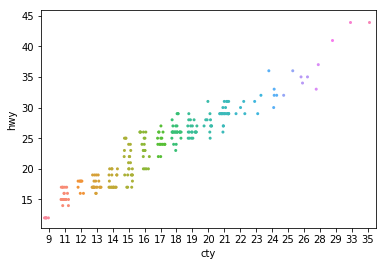

In [58]:
# we can see that not so much variation between city and highway milage
#if we try to ploting the same using scatterr plot
#we will get over lapping of data points
#one way to avoid the same is to use jitter plot
import seaborn as sns
sns.stripplot(car['cty'],car['hwy'],jitter=.3,size=3)
plt.show()

Correlation matrix : A matrix containing the corelation coefficient value of variables

In [59]:
# creating a correlation matrix
Matrix=car.corr()
Matrix


,Unnamed: 0,displ,year,cyl,cty,hwy
Unnamed: 0,1.000000,-0.402459,-0.073577,-0.407698,0.401822,0.327046
displ,-0.402459,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,-0.073577,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,-0.407698,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,0.401822,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,0.327046,-0.766020,0.002158,-0.761912,0.955916,1.000000


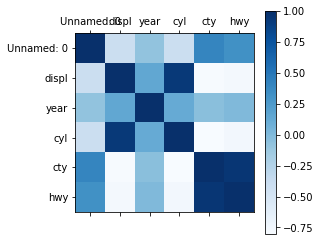

In [61]:
# Ploting the correlation matrix using matshow
# camp wll help you to give specific color to the matrix
import matplotlib.pyplot as plt
plt.matshow(Matrix,cmap="Blues")

#labeling the xticks and yticks
plt.xticks(range(len(Matrix.columns)),Matrix.columns)
plt.yticks(range(len(Matrix.columns)),Matrix.columns)

# Using the color bar to reference the colr
plt.colorbar()
plt.show()

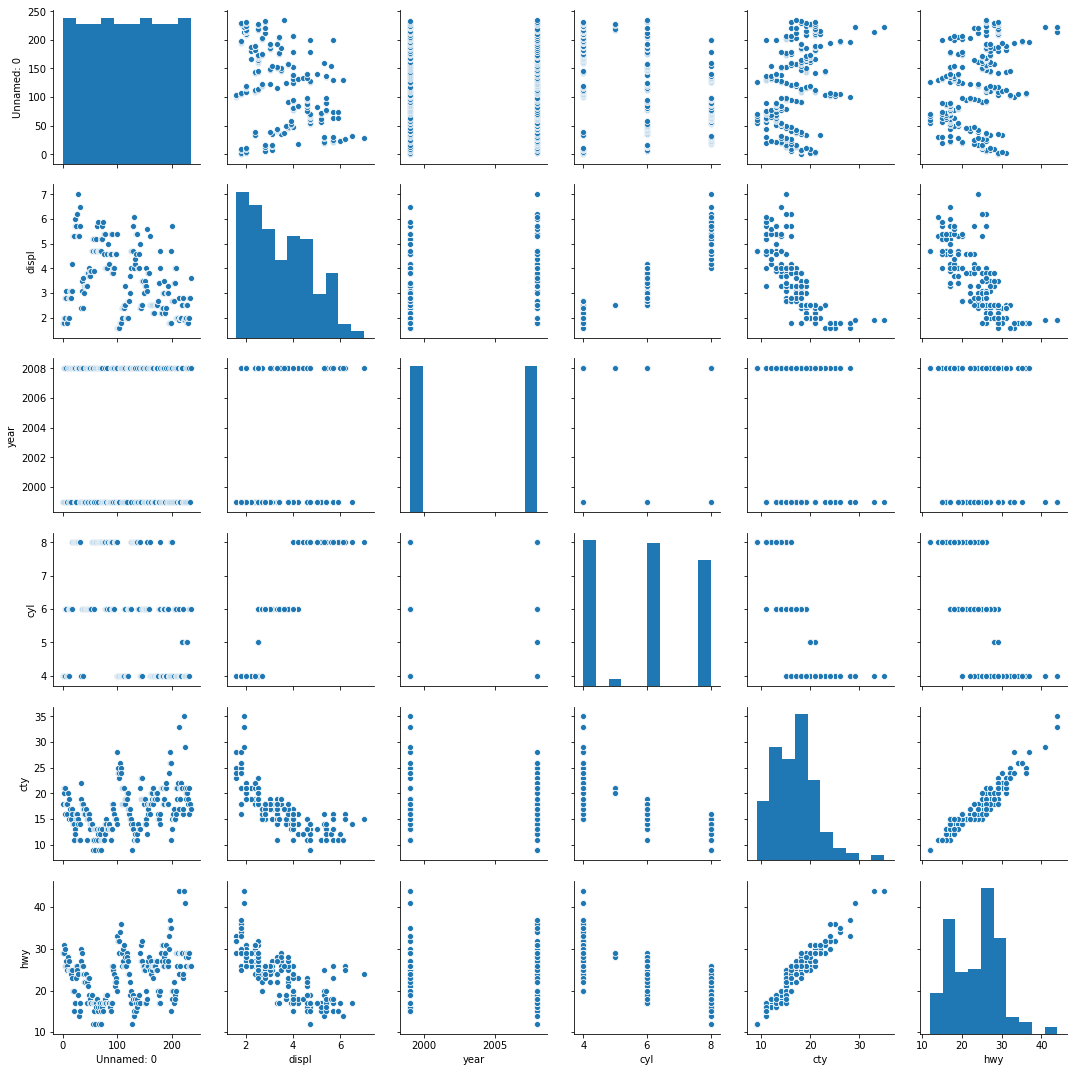

In [62]:
# pair plot
sns.pairplot(car)
plt.show()

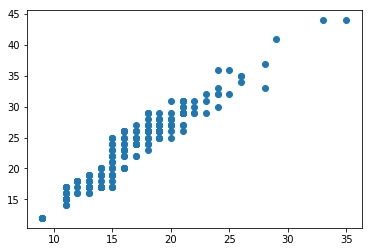

In [89]:
x1=car['cty']
y=car['hwy']
plt.scatter(x1,y)
plt.show()

In [90]:
import scipy
import statsmodels.api as sm
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2459.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          1.87e-125
Time:                        14:31:10   Log-Likelihood:                -462.28
No. Observations:                 234   AIC:                             928.6
Df Residuals:                     232   BIC:                             935.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8920      0.469      1.902      0.058      -0.032       1.816
cty            1.3375      0.027     49.585      0.000       1.284       1.391
==============================================================================
Omnibus:                        1.055   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.879
Skew:                           0.147   Prob(JB):                        0.644
Kurtosis:                       3.058   Cond. No.                         71.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

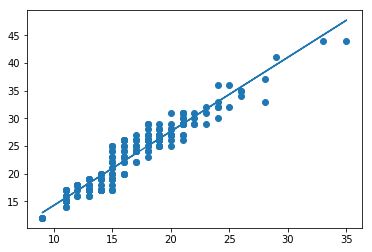

In [92]:
plt.scatter(x1,y)
yhat=1.3375*x1 + 0.8920
fig=plt.plot(x1,yhat,label='Regression line')
plt.show()

In [86]:
#?sm.add_constant

## New method to do Regression

In [106]:
# Lets import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression

In [107]:
# Using the car data
import os
import pandas as pd


In [110]:
#Creating a linear object
lm=LinearRegression()
# Taking only the city milage and highway milage (Y) column
X=car[['cty']]
Y=car[['hwy']]
#Fittiing the model
model1=lm.fit(X,Y)
model1    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
model1.intercept_

array([0.8920411])

In [113]:
model1.coef_

array([[1.33745561]])

In [115]:
val_data=pd.DataFrame.from_dict({'cty':[26]})
pred_highway_milage=model1.predict(val_data)
pred_highway_milage

array([[35.66588697]])

In [116]:
#lets split the data into 80 and 20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(187, 47, 187, 47)

In [118]:
#build a linear regression model usig my training data sets.
lm2=LinearRegression()
model2=lm2.fit(X_train,Y_train)
# testing the model on test data and storing it in a new column
Y_test['hwy_Pred']=model2.predict(X_test)
Y_test['hwy_Pred']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [122]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test['hwy'],Y_test['hwy_Pred'])


3.1727277746618188

In [ ]:
#lets predict the highway milage for a city milage of 26



## NLTK EDA analysis

In [4]:
# Importing the libraryies which we are us

import numpy as np
import pandas as pd
import string
import nltk
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

In [5]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
# importing the 
df=pd.read_csv('C:/Users/Administrator/Downloads/narendramodi_tweets.csv')
df.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [7]:
# subset the column of review .text
text=df[['text']]
text.head()

,text
0,The President's address wonderfully encapsulat...
1,Rashtrapati Ji's address to both Houses of Par...
2,RT @PMOIndia: Empowering the marginalised. htt...
3,RT @PMOIndia: Commitment to welfare of farmers...
4,RT @PMOIndia: Improving the quality of life fo...


In [8]:
# A very basic features we can extract is the number of words in each review
text['count']=text['text'].apply(lambda x:len(str(x).split(" ")))
text.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,count
0,The President's address wonderfully encapsulat...,14
1,Rashtrapati Ji's address to both Houses of Par...,16
2,RT @PMOIndia: Empowering the marginalised. htt...,6
3,RT @PMOIndia: Commitment to welfare of farmers...,8
4,RT @PMOIndia: Improving the quality of life fo...,11


In [25]:
# cleaning the data -removing te punctuation ,number converting every thing to lower case
text['clean_text']=text['text'].str.lower().str.replace('[^a-z ]','')
print(text['clean_text'][0])

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards transformingindia


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
# removing the stop words
stop=set(stopwords.words('english'))
# if you want the extend the stop word list
#stop.extend(['use','im'])
def sw(text):
    text=[word for word in text.split() if word not in stop]
    #joing the list list of words with space separtor
    return " ".join(text)
text['split_words']=text['clean_text'].apply(sw)
text.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,text,count,clean_text,split_words
0,The President's address wonderfully encapsulat...,14,the presidents address wonderfully encapsulate...,presidents address wonderfully encapsulated in...
1,Rashtrapati Ji's address to both Houses of Par...,16,rashtrapati jis address to both houses of parl...,rashtrapati jis address houses parliament inde...
2,RT @PMOIndia: Empowering the marginalised. htt...,6,rt pmoindia empowering the marginalised httpst...,rt pmoindia empowering marginalised httpstcoww...
3,RT @PMOIndia: Commitment to welfare of farmers...,8,rt pmoindia commitment to welfare of farmers h...,rt pmoindia commitment welfare farmers httpstc...
4,RT @PMOIndia: Improving the quality of life fo...,11,rt pmoindia improving the quality of life for ...,rt pmoindia improving quality life poor httpst...


In [16]:
# create a count vectorizer object
count_vectorizer=CountVectorizer()

In [17]:
# fit the count vecotizr using the text data
count_vectorizer.fit(text['split_words'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
#learn a vocabulary dictionary of tokens in the raw documents using fit on cv
dictionary=count_vectorizer.vocabulary_.items()
dictionary

dict_items([('presidents', 6530), ('address', 86), ('wonderfully', 8643), ('encapsulated', 1940), ('indias', 4674), ('strengths', 7728), ('aspirations', 416), ('potential', 6453), ('amp', 256), ('efforts', 1872), ('towards', 8114), ('transformingindia', 8147), ('rashtrapati', 6796), ('jis', 4951), ('houses', 2800), ('parliament', 6191), ('indepth', 4609), ('extensive', 2128), ('hear', 2685), ('httpstcordkqtjgnnx', 3891), ('rashtrapatibhvn', 6797), ('rt', 7078), ('pmoindia', 6392), ('empowering', 1933), ('marginalised', 5502), ('httpstcowwsqgwdk', 4260), ('commitment', 1170), ('welfare', 8585), ('farmers', 2170), ('httpstcopaafrfmrc', 3777), ('improving', 4564), ('quality', 6677), ('life', 5276), ('poor', 6422), ('httpstcougmvkz', 4097), ('financial', 2245), ('inclusion', 4585), ('poverty', 6456), ('alleviation', 214), ('httpstcoxtzyhhte', 4322), ('fourdecade', 2339), ('old', 6065), ('demand', 1535), ('onerankonepension', 6076), ('orop', 6122), ('armed', 364), ('forces', 2307), ('vetera

In [21]:
# learn the vocabualary dictionary and return term document matrix -fit_transform
# creat DTM
x=count_vectorizer.fit_transform(text['split_words'])
x

<3220x8762 sparse matrix of type '<class 'numpy.int64'>'
	with 33493 stored elements in Compressed Sparse Row format>

In [22]:
## visualize the elements of sparse matrix by converting it into array
DTM=pd.DataFrame(x.toarray(),columns=count_vectorizer.get_feature_names())
DTM.head()

,aabhar,aadhaar,aadhar,aajtak,aamirkhan,aanandmayi,aap,aawas,aazadisaal,abdel,...,zaidi,zayed,zeal,zero,zhejiang,ziara,zimbabwe,zone,zones,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
##Get the word and its repective freqency for the whole documents
DTM.sum().head()

aabhar       1
aadhaar      6
aadhar       1
aajtak       1
aamirkhan    1
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


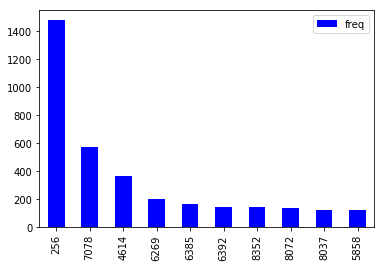

In [30]:
# word and tehier freqency
word_count_freq=DTM.sum()
# word_count_freq.sort_values(ascending=False)
word_table=pd.DataFrame(word_count_freq).reset_index()
word_table=word_table.rename(columns={'index':'word',0:"freq"})
word_table.sort_values(by='freq',ascending=False).head(10).plot.bar(colors='blue')


In [1]:
# We will use the inbuild data set from pydataset
from pydataset import data
df=data('chickwts')
df.head()

,weight,feed
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean


In [2]:
df.shape

(71, 2)

In [3]:
# exactly unique values of a part col
df['feed'].unique()

array(['horsebean', 'linseed', 'soybean', 'sunflower', 'meatmeal',
       'casein'], dtype=object)

In [4]:
# no of unique values in particular columns
df['feed'].nunique()

6

In [5]:
# lets check the sample size of each feed
x=df.groupby(['feed']).size().reset_index()
x

,feed,0
0,casein,12
1,horsebean,10
2,linseed,12
3,meatmeal,11
4,soybean,14
5,sunflower,12


In [6]:
# sample size seems having equal sample sizes
#lests check the mean weight of each feed
df.groupby(['feed'])['weight'].mean().reset_index()

,feed,weight
0,casein,323.583333
1,horsebean,160.200000
2,linseed,218.750000
3,meatmeal,276.909091
4,soybean,246.428571
5,sunflower,328.916667


In [13]:
# lets create a null and alternative hypothesis
# H0 : feed has no impact weight
# H1 : feed does impact weight
# input the anova function is the panadas series of different sample
# lets create each series of panadas for each group by following below steps
# step 1: Creating panadas series of weight for each group
casein=df['weight'][df['feed']=='casein'].reset_index()
horsebean=df['weight'][df['feed']=='horsebean'].reset_index()
linseed=df['weight'][df['feed']=='linseed'].reset_index()
meatmeal=df['weight'][df['feed']=='meatmeal'].reset_index()
soybean=df['weight'][df['feed']=='soybean'].reset_index()
sunflower=df['weight'][df['feed']=='sunflower'].reset_index()


In [14]:
casein=casein['weight']
horsebean=horsebean['weight']
linseed=linseed['weight']
meatmeal=meatmeal['weight']
soybean=soybean['weight']
sunflower=sunflower['weight']


In [18]:
import pandas as pd
anova=pd.concat([casein,horsebean,linseed,meatmeal,soybean,sunflower],axis=1)
anova

,weight,weight,weight,weight,weight,weight
0,368.0,179.0,309.0,325.0,243,423.0
1,390.0,160.0,229.0,257.0,230,340.0
2,379.0,136.0,181.0,303.0,248,392.0
3,260.0,227.0,141.0,315.0,327,339.0
4,404.0,217.0,260.0,380.0,329,341.0
5,318.0,168.0,203.0,153.0,250,226.0
6,352.0,108.0,148.0,263.0,193,320.0
7,359.0,124.0,169.0,242.0,271,295.0
8,216.0,143.0,213.0,206.0,316,334.0
9,222.0,140.0,257.0,344.0,267,322.0


In [19]:
#anova.to_csv("C:/Users/Administrator/Desktop/anova.csv")

## standardization
The aim here is to achive gaussian with zero mean and unit varience. There are many ways to doing this the most two ways are standardisation and normalization

In [10]:
import pandas as pd
import numpy as np


In [14]:
data=pd.read_csv("C:/Users/Administrator/Downloads/Rain Prediction Train.csv")
pd.options.display.max_rows=900
display(data)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,ESE,7.0,19.0,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,NNE,13.0,19.0,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,E,7.0,6.0,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,NE,13.0,43.0,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,NNW,7.0,15.0,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No
5,20-05-2016,Albany,10.1,21.8,0.0,0.8,NaN,NaN,NaN,N,NaN,4.0,NaN,93.0,NaN,1011.7,1003.9,1.0,NaN,12.9,NaN,No,Yes
6,20-01-2011,Sale,12.5,24.7,0.0,6.4,6.6,E,31.0,NE,SE,11.0,19.0,74.0,64.0,1014.1,1010.9,7.0,3.0,17.5,23.1,No,No
7,24-02-2016,Moree,19.9,35.0,0.0,10.2,12.5,NNE,37.0,N,NW,24.0,9.0,56.0,23.0,1017.4,1013.3,0.0,1.0,24.2,34.4,No,No
8,28-04-2009,Portland,7.1,13.0,3.6,1.4,3.4,SW,37.0,S,S,13.0,13.0,64.0,52.0,1022.0,1022.7,4.0,6.0,9.7,11.7,Yes,No
9,08-07-2016,Penrith,12.5,16.9,0.8,NaN,NaN,SW,26.0,SSW,SSW,7.0,6.0,94.0,94.0,NaN,NaN,NaN,NaN,13.3,13.1,No,Yes


In [12]:
len(data.columns)

23

In [46]:
data.shape

(100000, 23)

In [47]:
data1=data[['MinTemp',"Rainfall",'Evaporation','WindSpeed9am','Pressure9am']]
data1.head()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
0,17.7,2.2,1.6,7.0,1017.3
1,6.7,0.0,5.4,13.0,1014.0
2,6.2,0.0,4.2,7.0,1022.5
3,13.8,0.0,NaN,13.0,1017.0
4,13.4,0.0,6.0,7.0,1016.8


In [48]:
import seaborn as sb
import matplotlib.pyplot as plt

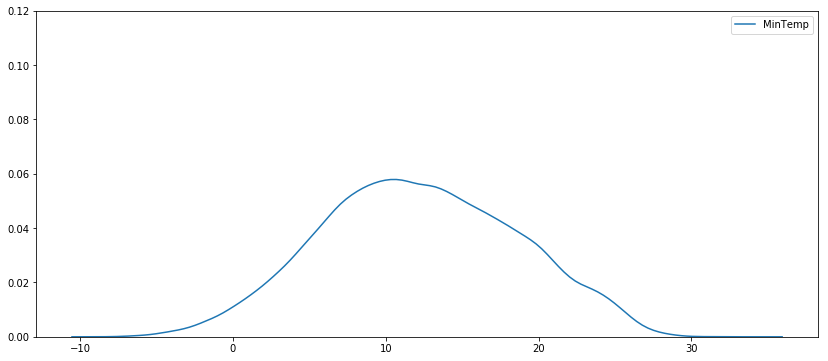

In [53]:
plt.figure(figsize=(14,6))
plt.ylim(0,0.12)
sb.kdeplot(data1['MinTemp'])
#sb.kdeplot(data1['Rainfall'])

## standard scalar
the mean and standard deviation are calculated for the feature and the feature is scaled based on
xi=mean(x)/stdev(x)
if the data is not normalay distributed this is not the best scalr to use
the data will normally distributed within each feature and will scale them such that now around 0 and std of 1

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc=StandardScaler()
sc_data=sc.fit_transform(data1)
sc_data=pd.DataFrame(sc_data,columns=['MinTemp','Rainfall','Evaporation','WindSpeed9am','Pressure9am'])
sc_data.head()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
0,0.859129,-0.017575,-0.923793,-0.787566,-0.046698
1,-0.856185,-0.280812,-0.016131,-0.113284,-0.511133
2,-0.934154,-0.280812,-0.302761,-0.787566,0.685139
3,0.250973,-0.280812,NaN,-0.113284,-0.088919
4,0.188597,-0.280812,0.127184,-0.787566,-0.117067


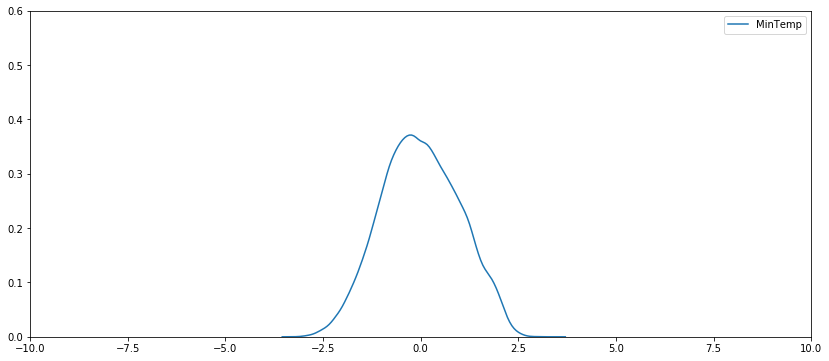

In [54]:
plt.figure(figsize=(14,6))
plt.ylim(0,0.6)
plt.xlim(-10,10)
sb.kdeplot(sc_data["MinTemp"])
#sb.kdeplot(sc_data['Rainfall'])
#sb.kdeplot(sc_data["Evaporation"])
#sb.kdeplot(sc_data["WindSpeed9am"])
#sb.kdeplot(sc_data["Pressure9am"])

## Min-Max Scaler
xi=xi-min(x)/max(x)-min(x)
its range such that the range in between 0 and 1(or-1 to 1 if there are negetive value)
this work better if standradiztion by normal not woring in a data set then we will apply the 'min max" normalization

however if it has sensitive outlier you might want to consider the "Roubust scalar'


In [58]:
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
mmsc_data=mmsc.fit_transform(data1)
mmsc_data=pd.DataFrame(mmsc_data)
mmsc_data.columns=data1.columns
mmsc_data.head()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
0,0.617925,0.007902,0.011034,0.053846,0.608264
1,0.358491,0.000000,0.037241,0.100000,0.553719
2,0.346698,0.000000,0.028966,0.053846,0.694215
3,0.525943,0.000000,NaN,0.100000,0.603306
4,0.516509,0.000000,0.041379,0.053846,0.600000


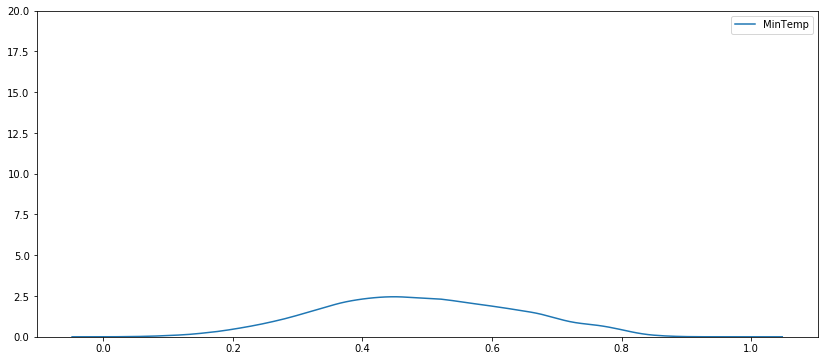

In [67]:
plt.figure(figsize=(14,6))
plt.ylim(0,20)

sb.kdeplot(mmsc_data["MinTemp"])
#sb.kdeplot(mmsc_data['Rainfall'])
#sb.kdeplot(mmsc_data["Evaporation"])
#sb.kdeplot(mmsc_data["WindSpeed9am"])
#sb.kdeplot(mmsc_data["Pressure9am"])

## Robust Scaler
insted of similar method to min max here we use inerquatrile for outlier dataset
xi=xi-Q1(x)/Q3(x)-Q1(x)

ofcourse this means it is using the less of data for scaling


In [ ]:
from sklearn.preprocessing import RobustScaler
rbsc=RobustScaler()
rbsc_data=rbsc.fit_transform(data1)
rbsc_data=pd.DataFrame(rbsc_data)
rbsc_data.columns=data1.columns
rbsc_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


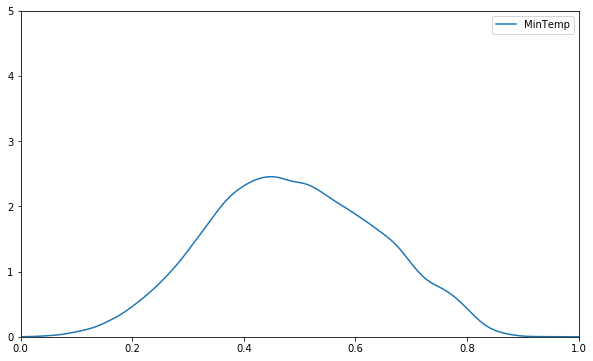

In [71]:
plt.figure(figsize=(10,6))
plt.ylim(-5,5)
plt.xlim(0,1)
sb.kdeplot(mmsc_data["MinTemp"])
#sb.kdeplot(mmsc_data['Rainfall'])
#sb.kdeplot(mmsc_data["Evaporation"])
#sb.kdeplot(mmsc_data["WindSpeed9am"])
#sb.kdeplot(mmsc_data["Pressure9am"])

## Normalizer
> Normalizer works on the rows not the columns!
> BY default ,L2 normalization is applied to each observation so the that the values in a row have
a unit norm.unit norm with L2 means that if each element were squared and summed the total would equal 1
>normalizer does transform all the feature to values -1 to 1

In [73]:
data1=data1.dropna()
from sklearn.preprocessing import Normalizer
norm=Normalizer()
norm_data=norm.fit_transform(data1)
norm_data=pd.DataFrame(norm_data)
norm_data.columns=data1.columns
norm_data.head()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
0,0.017396,0.002162,0.001573,0.006880,0.999821
1,0.006607,0.000000,0.005325,0.012819,0.999882
2,0.006063,0.000000,0.004107,0.006846,0.999950
3,0.013177,0.000000,0.005900,0.006883,0.999872
4,0.009983,0.000000,0.000791,0.003954,0.999942


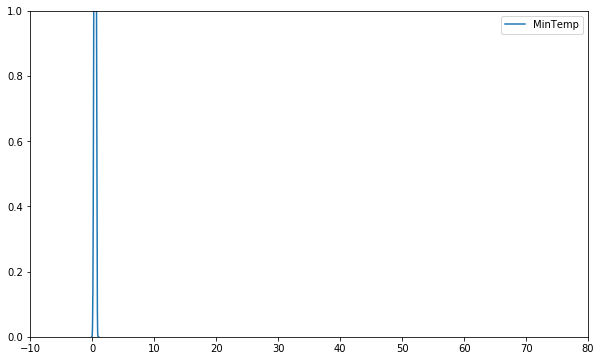

In [76]:
plt.figure(figsize=(10,6))
plt.ylim(-1,1)
plt.xlim(-10,80)
sb.kdeplot(mmsc_data["MinTemp"])
#sb.kdeplot(mmsc_data['Rainfall'])
#sb.kdeplot(mmsc_data["Evaporation"])
#sb.kdeplot(mmsc_data["WindSpeed9am"])
#sb.kdeplot(mmsc_data["Pressure9am"])

In [ ]:
##Wrap up

> Use minmax scaler as the default if you are tranforing a feature ,its non-distoring.
>you could use rubost sclaer if you have outlier and want to reduce their influence,however,
you might be better off removing the outlier,insted
>use standard scaler if you need relativily normal distribution
>

## Categorical vs Categorical-Chi-square test
H0 : smoking habit is independet of exercise level
H1 : smoking habit depened on exercise level

In [2]:
# lets import the data
from pydataset import data
survey=data('survey')
survey.shape


(237, 12)

In [4]:
import pandas as pd
tble=pd.crosstab(index=survey['Smoke'],columns=survey["Exer"])
tble

Exer,Freq,None,Some
Smoke,,,
Heavy,7,1,3
Never,87,18,84
Occas,12,3,4
Regul,9,1,7


In [5]:
from scipy.stats import chi2_contingency
chi2_contingency(tble)  #firstvalue chi_square statstics,2nd value is p-value,3rd value is d.f

(5.488545890584232,
 0.48284216946545633,
 6,
 array([[ 5.36016949,  1.0720339 ,  4.56779661],
        [92.09745763, 18.41949153, 78.48305085],
        [ 9.25847458,  1.85169492,  7.88983051],
        [ 8.28389831,  1.65677966,  7.05932203]]))

## bi veriate analysis of categorical vs categorical

In [93]:
import  pandas as pd
tble= pd.crosstab(index=survey['Smoke'],columns=survey['Exer'])
tble

Exer,Freq,None,Some
Smoke,,,
Heavy,7,1,3
Never,87,18,84
Occas,12,3,4
Regul,9,1,7


In [94]:
#lets plot avg age of for each smoker and excercise person
mean_age=survey.groupby(['Smoke','Exer'])['Age'].mean().reset_index()
mean_age

,Smoke,Exer,Age
0,Heavy,Freq,22.773714
1,Heavy,None,20.917000
2,Heavy,Some,18.333667
3,Never,Freq,20.151379
4,Never,None,21.176000
5,Never,Some,20.179607
6,Occas,Freq,19.465250
7,Occas,None,25.805667
8,Occas,Some,18.875250
9,Regul,Freq,21.500000


In [96]:
#converting from a long data -wide data=>pivot
df=mean_age.pivot('Smoke','Exer',"Age")
df.head()

Exer,Freq,None,Some
Smoke,,,
Heavy,22.773714,20.917000,18.333667
Never,20.151379,21.176000,20.179607
Occas,19.465250,25.805667,18.875250
Regul,21.500000,17.583000,21.154857


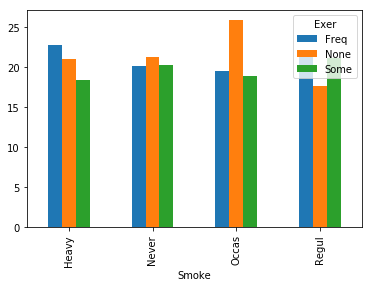

In [97]:
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<function matplotlib.pyplot.show(*args, **kw)>

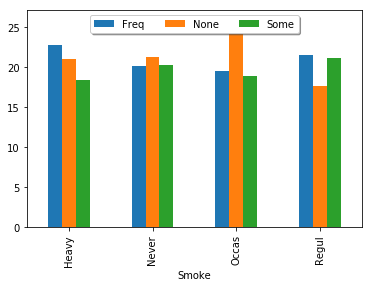

In [107]:
#pandas will show grouped bars by columns
#entrise in each row but differnt coluns will consititute a group in the resuting plot
# hence you need to "reshape your dataframe to have the "group" as columns
# in this case you cant pivot like
# Createing a subplot to place lagends
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(kind='bar')

ax=plt.subplot(111)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1),ncol=4,fancybox=True,shadow=True)
plt.show

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='bar',staced=)


## Data Cleaning and missing handaling

In [109]:
#lets import the data
import pandas as pd
import numpy as np
election=pd.read_excel("C:/Users/Administrator/Downloads/Election data base.xlsx")
election.shape

(327294, 11)

In [113]:
# we can see lot of missing vales .lets check the number rows in each coluns having
null_value=election.isnull().sum()
null_value
#lets find the percentage of missing value
percentage_missing=((null_value)/(len(election.index)))*100
percentage_missing

st_name       0.000000
year          0.000000
ac_no         0.000000
ac_name       4.913931
ac_type       0.000000
cand_name     0.000306
cand_sex      1.619950
partyname     0.000000
partyabbre    0.826780
totvotpoll    0.002139
electors      0.000000
dtype: float64

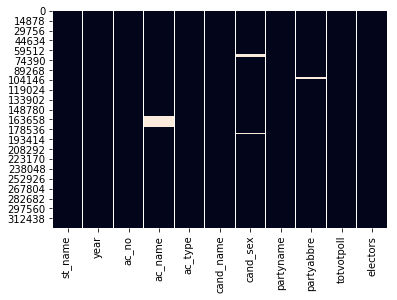

In [115]:
#we can also use plot the data to find which column have more miissing value
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(election.isnull(),cbar=False)

In [116]:
# replacing the missing value by zero or somthing
election['totvot_zero_fill']=election['totvotpoll'].fillna(0)
election.isnull().sum()


st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
dtype: int64

In [117]:
# by mean/median of  totvotpoll
totvotpoll_mean=election['totvotpoll'].mean()
totvotpoll_mean

9299.67342118691

In [118]:
election['totvot_mean_fill']=election['totvotpoll'].fillna(totvotpoll_mean)

In [119]:
#lets check impact of imputing the missing value by mean
sikkim_data=election[election['st_name']=="Sikkim"]
#lets check the missing value which are in 2004
sikkim_data_missing=sikkim_data[sikkim_data['year']==2004]
sikkim_data_missing

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,totvot_zero_fill,totvot_mean_fill
229199,Sikkim,2004.0,1,Yoksam,GEN,Akar Dhoj Limbu,M,Sikkim Himali Rajya Parishad,SHRP,107.0,8035,107.0,107.000000
229200,Sikkim,2004.0,1,Yoksam,GEN,Mangal Bir Subba,M,Indian National Congress,INC,2427.0,8035,2427.0,2427.000000
229201,Sikkim,2004.0,1,Yoksam,GEN,Kalawati Subba,F,Sikkim Democratic Front,SDF,3947.0,8035,3947.0,3947.000000
229202,Sikkim,2004.0,2,Tashiding,BL,Pulling Lepcha,M,Independent,IND,85.0,6365,85.0,85.000000
229203,Sikkim,2004.0,2,Tashiding,BL,Sonam Dadul Kazi,M,Indian National Congress,INC,1778.0,6365,1778.0,1778.000000
229204,Sikkim,2004.0,2,Tashiding,BL,Dawa Narbu Takarpa,M,Sikkim Democratic Front,SDF,3509.0,6365,3509.0,3509.000000
229205,Sikkim,2004.0,3,Geyzing,GEN,Chandra Bahadur Katwal,M,Independent,IND,64.0,8574,64.0,64.000000
229206,Sikkim,2004.0,3,Geyzing,GEN,Dhan Bahadur Gurung,M,Independent,IND,69.0,8574,69.0,69.000000
229207,Sikkim,2004.0,3,Geyzing,GEN,Dal Bdr. Gurung,M,Indian National Congress,INC,2410.0,8574,2410.0,2410.000000
229208,Sikkim,2004.0,3,Geyzing,GEN,Sher Bahadur Subedi,M,Sikkim Democratic Front,SDF,4227.0,8574,4227.0,4227.000000


In [122]:
#lets plot vote year wise
totvotpoll_line=sikkim_data.groupby(['year'])['totvotpoll'].sum().reset_index()
totvotpoll_line.head()

#lets get same for the column where  you have imputed the mean values

totvotpoll_mean_fill_line=sikkim_data.groupby(['year'])['totvot_mean_fill'].sum()
totvotpoll_mean_fill_line.head()

year
1979.0     72339.0
1985.0     97057.0
1989.0    133619.0
1994.0    173457.0
1999.0    204927.0
Name: totvot_mean_fill, dtype: float64

ValueError: Unrecognized character t in format string

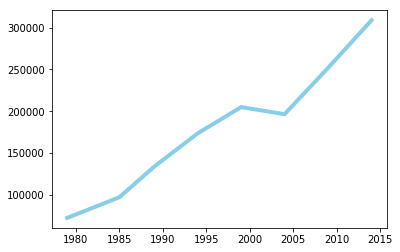

In [126]:
# lets check these two line chart
plt.plot('year','totvotpoll',data=totvotpoll_line,color='skyblue',linewidth=4)
plt.plot('year','totvot_mean_fill',data=totvotpoll_mean_fill_line,color='olive',linewidth=2)
plt.legend()
plt.show()

In [ ]:
# replace them by forward fill or black fill
election['Forward_fill']=election['totvotpoll'].fillna(method='ffill')
election.isnull().sum()
# lets check forward fill work

In [2]:
import pandas as pd
election=pd.read_excel("C:/Users/Administrator/Downloads/Election data base.xlsx")

In [4]:
election.shape

(327294, 11)

In [5]:
#extract numeric dataframe
election=election._get_numeric_data()
election.head()

,year,ac_no,totvotpoll,electors
0,1978.0,1,813.0,83247
1,1978.0,1,1743.0,83247
2,1978.0,1,4427.0,83247
3,1978.0,1,19805.0,83247
4,1978.0,1,34251.0,83247


In [7]:
##get the missing val
election.isnull().sum()

year          0
ac_no         0
totvotpoll    7
electors      0
dtype: int64

In [8]:
#!pip install missingpy

In [ ]:
#from missingpy import KNNImputer